<a href="https://colab.research.google.com/github/santiagonajera/ClusterUbicacion/blob/main/Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

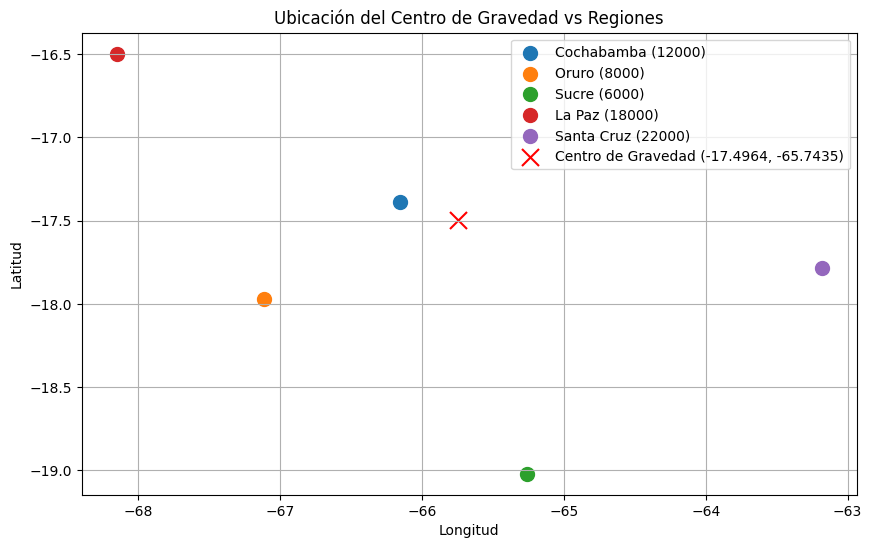

((np.float64(-17.49636666666667), np.float64(-65.7435303030303)),
 np.float64(0.4268633585561988))

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de demanda y coordenadas
demanda = {
    'La Paz': 18000,
    'Santa Cruz': 22000,
    'Cochabamba': 12000,
    'Oruro': 8000,
    'Sucre': 6000
}

coordenadas = {
    'Cochabamba': (-17.3895, -66.1568),
    'Oruro': (-17.9715, -67.1116),
    'Sucre': (-19.0196, -65.2610)
}

# Asumimos coordenadas para La Paz y Santa Cruz (no proporcionadas en la imagen)
# Usaremos valores aproximados basados en datos conocidos
coordenadas['La Paz'] = (-16.4980, -68.1500)
coordenadas['Santa Cruz'] = (-17.7833, -63.1833)

# Cálculo del centro de gravedad
x_coords = np.array([coordenadas[region][0] for region in demanda])
y_coords = np.array([coordenadas[region][1] for region in demanda])
demandas = np.array(list(demanda.values()))

X_cd = np.sum(x_coords * demandas) / np.sum(demandas)
Y_cd = np.sum(y_coords * demandas) / np.sum(demandas)

# Resultados
centro_gravedad = (X_cd, Y_cd)

# Graficar
plt.figure(figsize=(10, 6))
for region in coordenadas:
    plt.scatter(coordenadas[region][1], coordenadas[region][0], label=f'{region} ({demanda[region]})', s=100)

plt.scatter(Y_cd, X_cd, color='red', label=f'Centro de Gravedad ({centro_gravedad[0]:.4f}, {centro_gravedad[1]:.4f})', s=150, marker='x')

plt.title('Ubicación del Centro de Gravedad vs Regiones')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.grid(True)
plt.show()

# Comparación con Cochabamba
distancia_cochabamba = np.sqrt((X_cd - coordenadas['Cochabamba'][0])**2 + (Y_cd - coordenadas['Cochabamba'][1])**2)

centro_gravedad, distancia_cochabamba

In [2]:
import folium
import numpy as np

# Datos de demanda y coordenadas
demanda = {
    'La Paz': 18000,
    'Santa Cruz': 22000,
    'Cochabamba': 12000,
    'Oruro': 8000,
    'Sucre': 6000
}

coordenadas = {
    'Cochabamba': (-17.3895, -66.1568),
    'Oruro': (-17.9715, -67.1116),
    'Sucre': (-19.0196, -65.2610),
    'La Paz': (-16.4980, -68.1500),
    'Santa Cruz': (-17.7833, -63.1833)
}

# Cálculo del centro de gravedad
x_coords = np.array([coordenadas[region][0] for region in demanda])
y_coords = np.array([coordenadas[region][1] for region in demanda])
demandas = np.array(list(demanda.values()))

X_cd = np.sum(x_coords * demandas) / np.sum(demandas)
Y_cd = np.sum(y_coords * demandas) / np.sum(demandas)

# Crear el mapa centrado en Bolivia
m = folium.Map(location=[-17.5, -65.0], zoom_start=6)

# Añadir marcadores para cada región
for region, coord in coordenadas.items():
    folium.Marker(
        location=coord,
        popup=f"{region} (Demanda: {demanda[region]} pallets)",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)

# Añadir marcador para el centro de gravedad
folium.Marker(
    location=[X_cd, Y_cd],
    popup=f"Centro de Gravedad (Lat: {X_cd:.4f}, Lon: {Y_cd:.4f})",
    icon=folium.Icon(color="red", icon="star")
).add_to(m)

# Mostrar el mapa
m


In [4]:
import folium
import numpy as np

# Datos de demanda y coordenadas
demanda = {
    'La Paz': 18000,
    'Santa Cruz': 22000,
    'Cochabamba': 12000,
    'Oruro': 8000,
    'Sucre': 6000
}

coordenadas = {
    'Cochabamba': (-17.3895, -66.1568),
    'Oruro': (-17.9715, -67.1116),
    'Sucre': (-19.0196, -65.2610),
    'La Paz': (-16.4980, -68.1500),
    'Santa Cruz': (-17.7833, -63.1833)
}

# Función para calcular la distancia euclidiana ponderada
def distancia_ponderada(coord1, coord2, demanda2):
    return np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2) * demanda2

# Evaluar cada ubicación como candidato para el CD
mejor_ubicacion = None
menor_distancia_total = float('inf')

for candidato in coordenadas:
    distancia_total = 0
    for region, coord in coordenadas.items():
        if region != candidato:
            distancia_total += distancia_ponderada(coordenadas[candidato], coord, demanda[region])

    if distancia_total < menor_distancia_total:
        menor_distancia_total = distancia_total
        mejor_ubicacion = candidato

# Crear el mapa centrado en Bolivia
m = folium.Map(location=[-17.5, -65.0], zoom_start=6)

# Añadir marcadores para cada región
for region, coord in coordenadas.items():
    folium.Marker(
        location=coord,
        popup=f"{region} (Demanda: {demanda[region]} pallets)",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)

# Resaltar la mejor ubicación
folium.Marker(
    location=coordenadas[mejor_ubicacion],
    popup=f"Mejor ubicación para CD: {mejor_ubicacion} (Distancia total ponderada: {menor_distancia_total:.2f})",
    icon=folium.Icon(color="green", icon="star")
).add_to(m)

# Mostrar el mapa
m

print(f"La mejor ubicación para el CD es: {mejor_ubicacion}")
print(f"Distancia total ponderada: {menor_distancia_total:.2f}")


La mejor ubicación para el CD es: Cochabamba
Distancia total ponderada: 125396.69


In [5]:
import folium
import numpy as np

# Datos de demanda y coordenadas
demanda = {
    'La Paz': 18000,
    'Santa Cruz': 22000,
    'Cochabamba': 12000,
    'Oruro': 8000,
    'Sucre': 6000
}

coordenadas = {
    'Cochabamba': (-17.3895, -66.1568),
    'Oruro': (-17.9715, -67.1116),
    'Sucre': (-19.0196, -65.2610),
    'La Paz': (-16.4980, -68.1500),
    'Santa Cruz': (-17.7833, -63.1833)
}

# Función para calcular la distancia euclidiana ponderada
def distancia_ponderada(coord1, coord2, demanda2):
    return np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2) * demanda2

# Evaluar cada ubicación como candidato para el CD
mejor_ubicacion = None
menor_distancia_total = float('inf')

for candidato in coordenadas:
    distancia_total = 0
    for region, coord in coordenadas.items():
        if region != candidato:
            distancia_total += distancia_ponderada(coordenadas[candidato], coord, demanda[region])

    if distancia_total < menor_distancia_total:
        menor_distancia_total = distancia_total
        mejor_ubicacion = candidato

# Crear el mapa centrado en Bolivia
m = folium.Map(location=[-17.5, -65.0], zoom_start=6)

# Añadir marcadores para cada región
for region, coord in coordenadas.items():
    folium.Marker(
        location=coord,
        popup=f"{region} (Demanda: {demanda[region]} pallets)",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)

# Resaltar la mejor ubicación
folium.Marker(
    location=coordenadas[mejor_ubicacion],
    popup=f"Mejor ubicación para CD: {mejor_ubicacion} (Distancia total ponderada: {menor_distancia_total:.2f})",
    icon=folium.Icon(color="green", icon="star")
).add_to(m)

# Mostrar el mapa
display(m)

print(f"La mejor ubicación para el CD es: {mejor_ubicacion}")
print(f"Distancia total ponderada: {menor_distancia_total:.2f}")


La mejor ubicación para el CD es: Cochabamba
Distancia total ponderada: 125396.69


In [6]:
import folium
import numpy as np
from IPython.display import display

# Datos de demanda y coordenadas
demanda = {
    'La Paz': 18000,
    'El Alto': 12000,
    'Santa Cruz de la Sierra': 26000,
    'Montero': 6000,
    'Warnes': 7000,
    'Cochabamba': 16000,
    'Quillacollo': 5000,
    'Sacaba': 5500,
    'Oruro': 9000,
    'Sucre': 7000,
    'Potosí': 5000,
    'Tarija': 6000,
    'Trinidad': 4000,
    'Cobija': 2500,
    'Viacha': 4500
}

coordenadas = {
    'La Paz': (-16.4897, -68.1193),
    'El Alto': (-16.5047, -68.1630),
    'Santa Cruz de la Sierra': (-17.7833, -63.1821),
    'Montero': (-17.3387, -63.2554),
    'Warnes': (-17.5134, -63.1470),
    'Cochabamba': (-17.3895, -66.1568),
    'Quillacollo': (-17.4023, -66.2857),
    'Sacaba': (-17.4047, -66.0360),
    'Oruro': (-17.9715, -67.1116),
    'Sucre': (-19.0196, -65.2610),
    'Potosí': (-19.5889, -65.7531),
    'Tarija': (-21.5355, -64.7296),
    'Trinidad': (-14.8344, -64.9052),
    'Cobija': (-11.0264, -68.7692),
    'Viacha': (-16.6500, -68.3000)
}

# Función para calcular la distancia euclidiana ponderada
def distancia_ponderada(coord1, coord2, demanda2):
    return np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2) * demanda2

# Evaluar cada ubicación como candidato para el CD
mejor_ubicacion = None
menor_distancia_total = float('inf')

for candidato in coordenadas:
    distancia_total = 0
    for region, coord in coordenadas.items():
        if region != candidato:
            distancia_total += distancia_ponderada(coordenadas[candidato], coord, demanda[region])

    if distancia_total < menor_distancia_total:
        menor_distancia_total = distancia_total
        mejor_ubicacion = candidato

# Crear el mapa centrado en Bolivia
m = folium.Map(location=[-17.5, -65.0], zoom_start=5.5)

# Añadir marcadores para cada región
for region, coord in coordenadas.items():
    folium.Marker(
        location=coord,
        popup=f"{region} (Demanda: {demanda[region]} pallets)",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)

# Resaltar la mejor ubicación
folium.Marker(
    location=coordenadas[mejor_ubicacion],
    popup=f"Mejor ubicación para CD: {mejor_ubicacion} (Distancia total ponderada: {menor_distancia_total:.2f})",
    icon=folium.Icon(color="green", icon="star")
).add_to(m)

# Mostrar el mapa
display(m)

print(f"La mejor ubicación para el CD es: {mejor_ubicacion}")
print(f"Distancia total ponderada: {menor_distancia_total:.2f}")


La mejor ubicación para el CD es: Cochabamba
Distancia total ponderada: 282357.21


In [7]:
!pip install folium pandas
import folium
import numpy as np
import pandas as pd
from IPython.display import display

# Leer los datos desde el archivo en GitHub
url = "https://github.com/santiagonajera/ClusterUbicacion/raw/refs/heads/main/coordenadas_nicaragua.txt"
df = pd.read_csv(url, sep='\t')  # Asumiendo que el separador es un tabulador

# Convertir los datos a un formato adecuado
demanda = dict(zip(df['CIUDAD'], df['DEMANDA (PALLETS/AÑO)']))
coordenadas = dict(zip(df['CIUDAD'], zip(df['LATITUD'], df['LONGITUD'])))

# Función para calcular la distancia euclidiana ponderada
def distancia_ponderada(coord1, coord2, demanda2):
    return np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2) * demanda2

# Evaluar cada ubicación como candidato para el CD
mejor_ubicacion = None
menor_distancia_total = float('inf')

for candidato in coordenadas:
    distancia_total = 0
    for region, coord in coordenadas.items():
        if region != candidato:
            distancia_total += distancia_ponderada(coordenadas[candidato], coord, demanda[region])

    if distancia_total < menor_distancia_total:
        menor_distancia_total = distancia_total
        mejor_ubicacion = candidato

# Crear el mapa centrado en Nicaragua
m = folium.Map(location=[12.5, -85.5], zoom_start=8)

# Añadir marcadores para cada región
for region, coord in coordenadas.items():
    folium.Marker(
        location=coord,
        popup=f"{region} (Demanda: {demanda[region]} pallets)",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)

# Resaltar la mejor ubicación
folium.Marker(
    location=coordenadas[mejor_ubicacion],
    popup=f"Mejor ubicación para CD: {mejor_ubicacion} (Distancia total ponderada: {menor_distancia_total:.2f})",
    icon=folium.Icon(color="green", icon="star")
).add_to(m)

# Mostrar el mapa
display(m)

print(f"La mejor ubicación para el CD es: {mejor_ubicacion}")
print(f"Distancia total ponderada: {menor_distancia_total:.2f}")


La mejor ubicación para el CD es: Managua
Distancia total ponderada: 220978.99


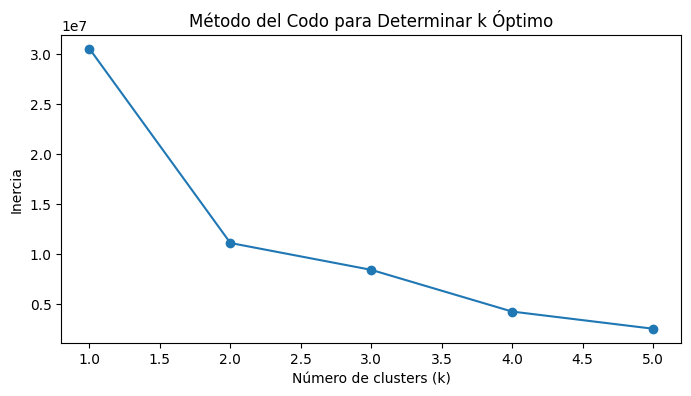

KeyError: 'Nogales'

In [10]:

import folium
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from IPython.display import display
import matplotlib.pyplot as plt

# Leer los datos desde el archivo en GitHub
url = "https://github.com/santiagonajera/ClusterUbicacion/raw/refs/heads/main/CordenadasMexico.txt"
df = pd.read_csv(url, sep='\t')

# Preparar los datos para K-means
X = df[['LATITUD', 'LONGITUD']].values
demandas = df['DEMANDA (PALLETS/AÑO)'].values
ciudades = df['CIUDAD'].values

# Método del codo para determinar el número óptimo de clusters
inercia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X, sample_weight=demandas)
    inercia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 4))
plt.plot(range(1, 6), inercia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar k Óptimo')
plt.show()

# Determinar k óptimo (puedes ajustar esto según el gráfico)
k_optimo = 2  # Cambia esto según el gráfico del codo

# Aplicar K-means con el k óptimo
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(X, sample_weight=demandas)
df['Cluster'] = kmeans.labels_

# Encontrar la ciudad más cercana a cada centroide
centros = []
for i in range(k_optimo):
    cluster_points = X[df['Cluster'] == i]
    distancias = np.linalg.norm(cluster_points - kmeans.cluster_centers_[i], axis=1)
    idx = np.argmin(distancias)
    mejor_ciudad = ciudades[df['Cluster'] == i][idx]
    centros.append(mejor_ciudad)

# Crear el mapa centrado en Nicaragua
m = folium.Map(location=[12.5, -85.5], zoom_start=8)

# Asignar colores a los clusters
colores = ['red', 'blue', 'green', 'purple', 'orange']

# Añadir marcadores para cada ciudad con colores según su cluster
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=(row['LATITUD'], row['LONGITUD']),
        radius=5,
        color=colores[row['Cluster']],
        fill=True,
        popup=f"{row['CIUDAD']} (Demanda: {row['DEMANDA (PALLETS/AÑO)']} pallets)"
    ).add_to(m)

# Resaltar los centros de distribución
for i, centro in enumerate(centros):
    coord = coordenadas[centro]
    folium.Marker(
        location=coord,
        popup=f"Centro de Distribución {i+1}: {centro}",
        icon=folium.Icon(color=colores[i], icon="star")
    ).add_to(m)

# Mostrar el mapa
display(m)

print(f"Los centros de distribución óptimos son: {centros}")


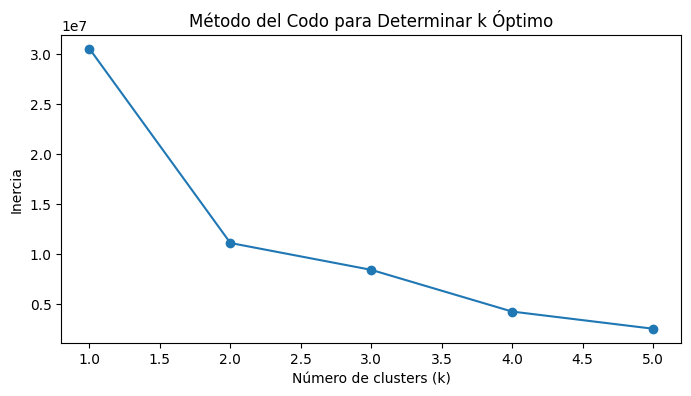

Los centros de distribución óptimos son: ['Tijuana', 'Querétaro', 'Chihuahua', 'Mérida']


In [14]:
import folium
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from IPython.display import display
import matplotlib.pyplot as plt

# Cargar el archivo (puedes cambiar la ruta o URL según sea necesario)
file_path = 'https://raw.githubusercontent.com/santiagonajera/ClusterUbicacion/refs/heads/main/CordenadasMexico.txt'  # Cambia esto por la ruta de tu archivo
df = pd.read_csv(file_path, sep='\t')  # Asumiendo que el separador es un tabulador

# Preparar los datos para K-means
X = df[['LATITUD', 'LONGITUD']].values
demandas = df['DEMANDA (PALLETS/AÑO)'].values
ciudades = df['CIUDAD'].values

# Método del codo para determinar el número óptimo de clusters
inercia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X, sample_weight=demandas)
    inercia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 4))
plt.plot(range(1, 6), inercia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar k Óptimo')
plt.show()

# Determinar k óptimo (puedes ajustar esto según el gráfico)
k_optimo = 4  # Cambia esto según el gráfico del codo

# Aplicar K-means con el k óptimo
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(X, sample_weight=demandas)
df['Cluster'] = kmeans.labels_

# Encontrar la ciudad más cercana a cada centroide
centros = []
for i in range(k_optimo):
    cluster_points = X[df['Cluster'] == i]
    distancias = np.linalg.norm(cluster_points - kmeans.cluster_centers_[i], axis=1)
    idx = np.argmin(distancias)
    mejor_ciudad = ciudades[df['Cluster'] == i][idx]
    centros.append(mejor_ciudad)

# Crear el mapa centrado en el promedio de las coordenadas
m = folium.Map(location=[df['LATITUD'].mean(), df['LONGITUD'].mean()], zoom_start=5)

# Asignar colores a los clusters
colores = ['red', 'blue', 'green', 'purple', 'orange']

# Añadir marcadores para cada ciudad con colores según su cluster
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=(row['LATITUD'], row['LONGITUD']),
        radius=5,
        color=colores[row['Cluster']],
        fill=True,
        popup=f"{row['CIUDAD']} (Demanda: {row['DEMANDA (PALLETS/AÑO)']} pallets)"
    ).add_to(m)

# Resaltar los centros de distribución
for i, centro in enumerate(centros):
    centro_coord = df[df['CIUDAD'] == centro][['LATITUD', 'LONGITUD']].values[0]
    folium.Marker(
        location=centro_coord,
        popup=f"Centro de Distribución {i+1}: {centro}",
        icon=folium.Icon(color=colores[i], icon="star")
    ).add_to(m)

# Mostrar el mapa
display(m)

print(f"Los centros de distribución óptimos son: {centros}")


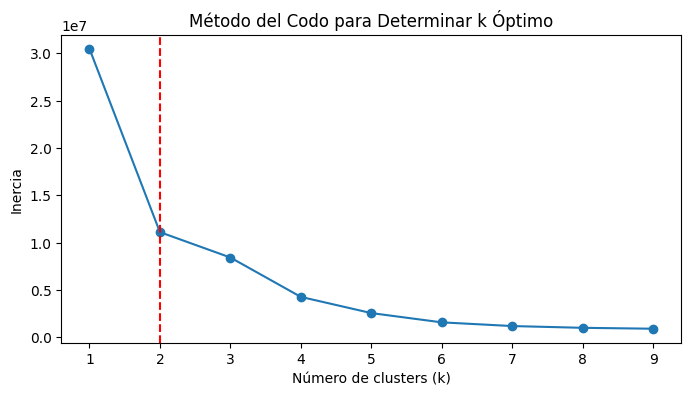

Número óptimo de clusters: 2


Los centros de distribución óptimos son: ['Nogales', 'Pachuca']


In [15]:
!pip install folium pandas scikit-learn numpy
import folium
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from IPython.display import display
import matplotlib.pyplot as plt

# Cargar el archivo (cambia esto por la ruta de tu archivo)
file_path = 'https://raw.githubusercontent.com/santiagonajera/ClusterUbicacion/refs/heads/main/CordenadasMexico.txt'
df = pd.read_csv(file_path, sep='\t')

# Preparar los datos para K-means
X = df[['LATITUD', 'LONGITUD']].values
demandas = df['DEMANDA (PALLETS/AÑO)'].values
ciudades = df['CIUDAD'].values

# Método del codo para determinar el número óptimo de clusters
inercia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X, sample_weight=demandas)
    inercia.append(kmeans.inertia_)

# Calcular las diferencias para encontrar el codo
diferencias = np.diff(inercia)
diferencias_ratio = diferencias[:-1] / diferencias[1:]
k_optimo = np.argmax(diferencias_ratio) + 2  # +2 porque diff reduce el tamaño del array en 1 y empezamos desde k=2

# Graficar el método del codo
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inercia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar k Óptimo')
plt.axvline(x=k_optimo, color='r', linestyle='--')
plt.show()

print(f"Número óptimo de clusters: {k_optimo}")

# Aplicar K-means con el k óptimo
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(X, sample_weight=demandas)
df['Cluster'] = kmeans.labels_

# Encontrar la ciudad más cercana a cada centroide
centros = []
for i in range(k_optimo):
    cluster_points = X[df['Cluster'] == i]
    distancias = np.linalg.norm(cluster_points - kmeans.cluster_centers_[i], axis=1)
    idx = np.argmin(distancias)
    mejor_ciudad = ciudades[df['Cluster'] == i][idx]
    centros.append(mejor_ciudad)

# Crear el mapa centrado en el promedio de las coordenadas
m = folium.Map(location=[df['LATITUD'].mean(), df['LONGITUD'].mean()], zoom_start=5)

# Asignar colores a los clusters
colores = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen']

# Añadir marcadores para cada ciudad con colores según su cluster
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=(row['LATITUD'], row['LONGITUD']),
        radius=5,
        color=colores[row['Cluster']],
        fill=True,
        popup=f"{row['CIUDAD']} (Demanda: {row['DEMANDA (PALLETS/AÑO)']} pallets)"
    ).add_to(m)

# Resaltar los centros de distribución
for i, centro in enumerate(centros):
    centro_coord = df[df['CIUDAD'] == centro][['LATITUD', 'LONGITUD']].values[0]
    folium.Marker(
        location=centro_coord,
        popup=f"Centro de Distribución {i+1}: {centro}",
        icon=folium.Icon(color=colores[i], icon="star")
    ).add_to(m)

# Mostrar el mapa
display(m)

print(f"Los centros de distribución óptimos son: {centros}")
